## Use single layer perceptron to classify handwritten digits

In [423]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import plot_confusion_matrix

In [424]:
np.random.seed(42)

### Load MNIST dataset (handwritten digit images) 

In [425]:
digits = datasets.load_digits()
X = digits.images
Y = digits.target
class_names = digits.target_names

### Normalize & flatten data

In [426]:
X = X.astype('float32')/255

cols = len(X[0]) * len(X[0])
flatX = np.empty((len(X), cols))
for i in range(len(X)):
    flatX[i] = X[i].flatten()
X = flatX

### Create Perceptron (binary classifier) for each digit from multi-class classifier using one vs all

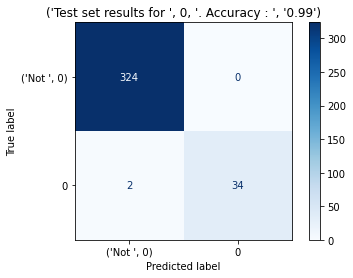

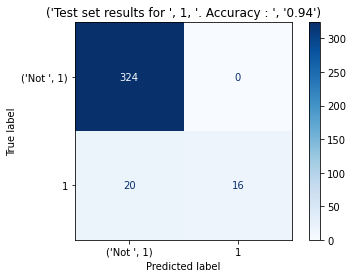

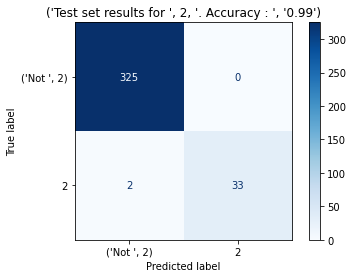

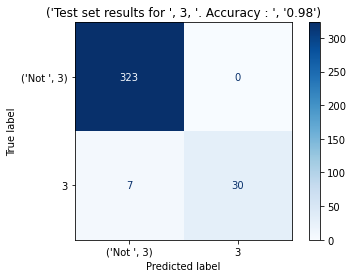

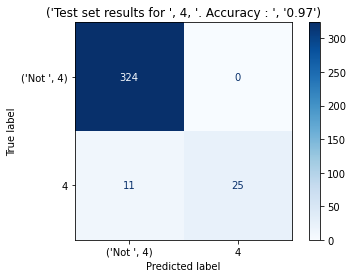

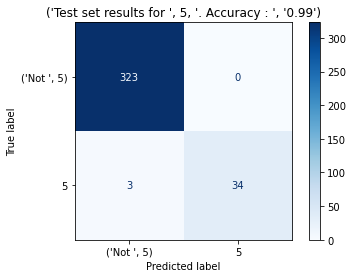

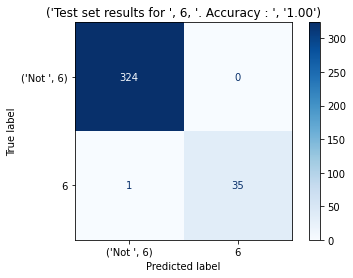

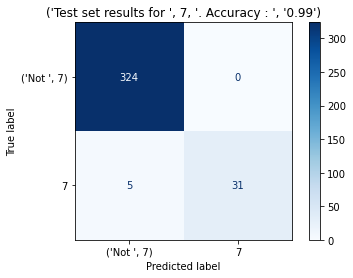

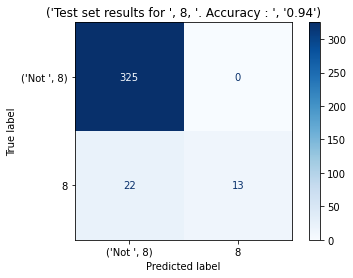

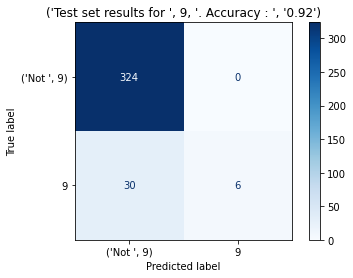

In [451]:
for num in class_names:
    arr = np.zeros(len(Y), dtype='int')
    for i in range(len(arr)):
        if (num == Y[i]):
            arr[i] = 1
        else:
            arr[i] = 0
     
    X_train, X_test, Y_train, Y_test = train_test_split(X, arr, test_size=0.2, random_state=0, stratify=Y)
    model = Perceptron(tol=1e-3, random_state=0).fit(X_train, Y_train)

    np.set_printoptions(precision=2)
    score = '{:.2f}'.format(model.score(X_test, Y_test))
    title = 'Test set results for ', num, '. Accuracy : ', score
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                     display_labels = [('Not ',num), num],
                                     cmap=plt.cm.Blues)
    disp.ax_.set_title(title)
    plt.show()